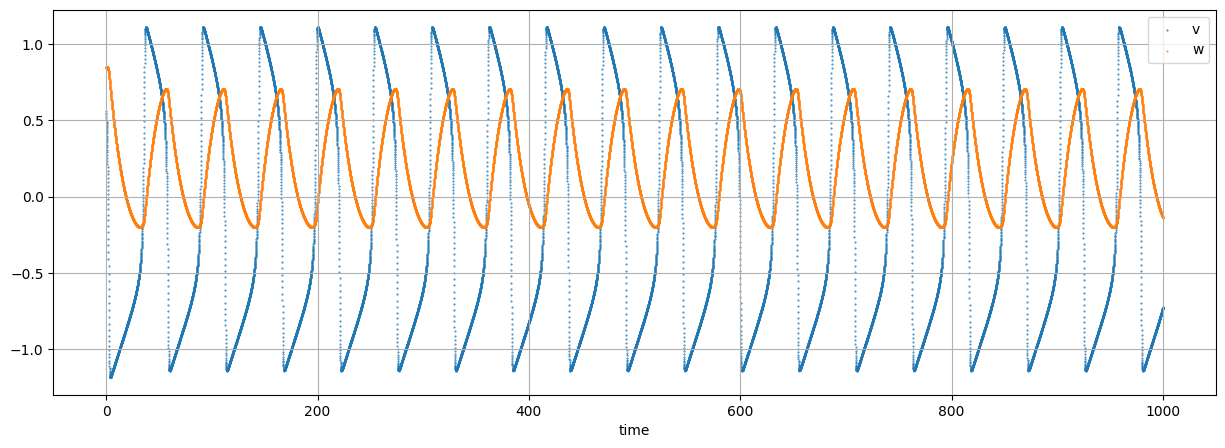

In [1]:
#import packages
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate
#parameters
I = 0.23
a = -0.3
b = 0.8
tau = 20
tf = 1000 #time upto which to compute
time_step = 0.05
#function to integrate
def fitz_numo(state,t):
    v = state[0]
    w = state[1]
    dv = v*(1-v**2)-w+I
    dw = (v-a-b*w)/tau
    state = np.array([dv,dw])
    return state
#initial conditions
X_ini = np.random.rand(2) #random values between 0 and 1
t_values = np.arange(0,tf,time_step) 
#times at which to compute the solution
results = scipy.integrate.odeint(func=fitz_numo,y0=X_ini,t=t_values)

##plot both time series in one figure
plt.figure().set_size_inches(15,5)
plt.scatter(t_values,results[:,0],s=0.2,label='v')
plt.scatter(t_values,results[:,1],s=0.2,label='w')
plt.xlabel('time')
plt.grid()
plt.legend()


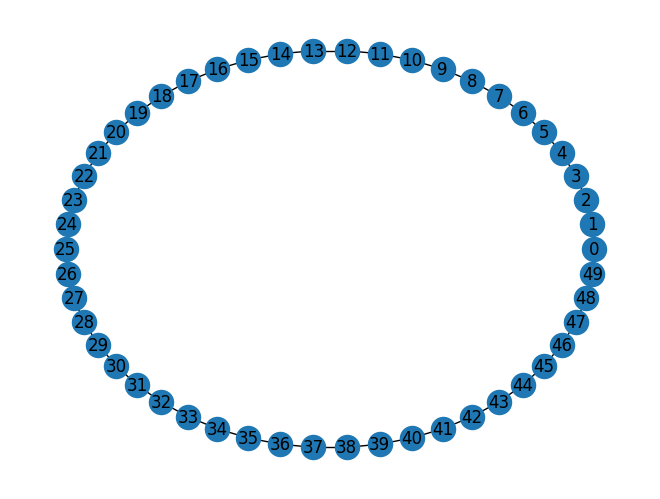

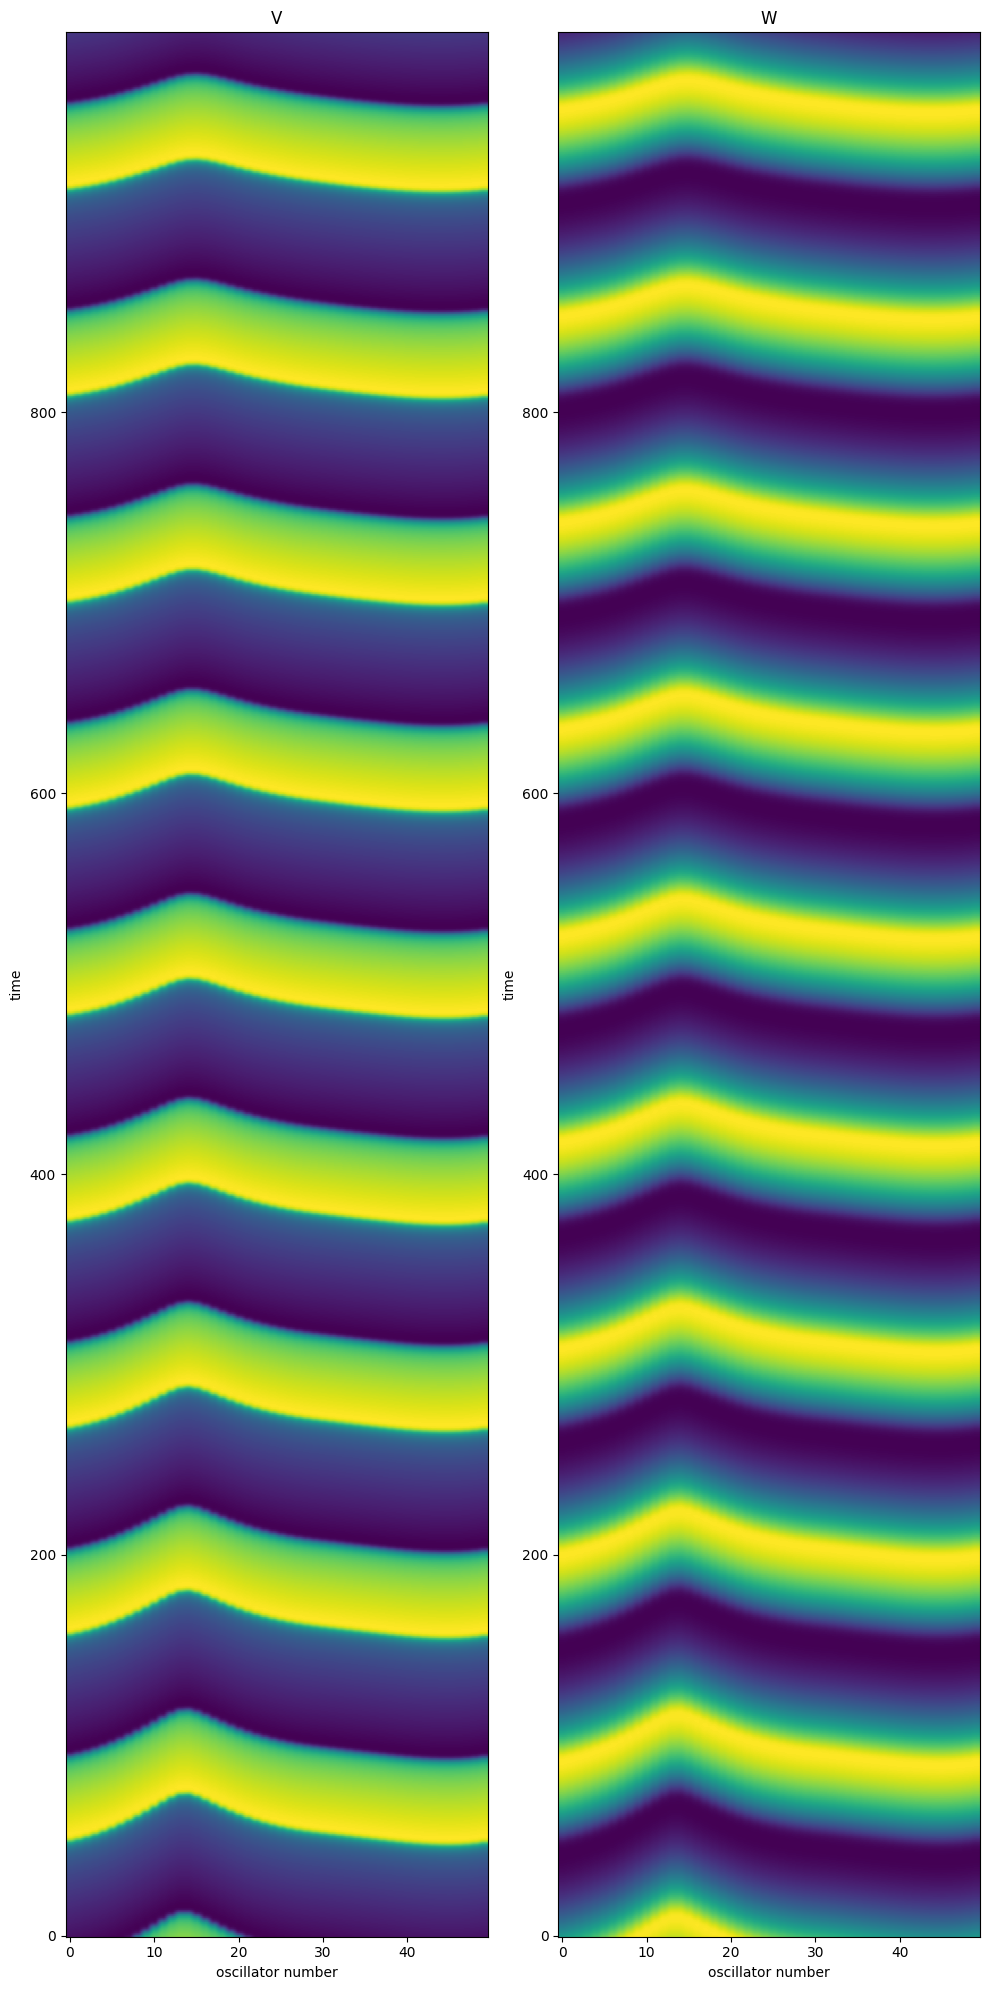

In [3]:
# Import necessary libraries
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate
N3 = 50 #number_of_oscillators
N = 2 #number of variables in each system
e = 0.1 #coupling strength

# Initial state
X_ini = np.random.rand(N3, N)

# Get even distribution of both positive and negative initial values
X_ini[:int(N3 / 2), :] = -1 * X_ini[:int(N3 / 2), :]

def F(X):
    # X is a 2-D array of v, w. Each row is an oscillator, and each column is a variable
    v = X.T[0]
    w = X.T[1]
    dv = v * (1 - v**2) - w + I
    dw = (v - a - b * w) / tau
    state = np.array([dv, dw])
    return state

def H(X):  # X is the set of all initial conditions
    S = np.zeros([N3, N])  # the coupling element
    for k in range(N3):
        s = np.asarray(np.sum(np.multiply(A[k], (X - X[k]).T), axis=1)).T
        S[k][0], S[k][1] = s[0], s[1]
    return S

def system_of_FHN(X0, t):
    X0 = X0.reshape(N3, N)  # to get back initial values in respective dimensions
    inherent_dynamics = F(X0).T  # returns a (N3, N) matrix
    coupling_factor = e * G[0]  # dimensions (1, N)
    coupling_dynamics = coupling_factor * H(X0)
    X_f = inherent_dynamics + coupling_dynamics
    return X_f.flatten()

def see_graphs(G):
    plt.figure()
    pos = nx.circular_layout(G)
    nx.draw(G, pos)
    nx.draw_networkx_labels(G, pos)
    plt.show()

# Generate the ring
gr = nx.cycle_graph(N3)
A = nx.to_numpy_array(gr)  # Updated to use 'to_numpy_array'
see_graphs(gr)

# Coupling matrix
G = np.zeros([N, N])  # controls which variables to be coupled.
G[0, 0] = 1  # indicates only x variables are coupled.

# Time values and integration
t_values = np.arange(0, 1000, 0.05)  # times at which to compute the solution
X_final = scipy.integrate.odeint(func=system_of_FHN, y0=X_ini.flatten(), t=t_values)

# Plot results
def plot_results(t_values, X_final, ts_plots=False):
    if ts_plots:
        plt.figure().set_size_inches(15, 10)
        plt.suptitle('Time Series Plots')
        for osc in range(0, N3):
            osc_V = osc * 2
            osc_W = osc * 2 + 1
            plt.subplot(211)
            plt.plot(t_values, X_final[:, osc_V], marker='o',
                     markersize=0.5, linewidth=0.2, alpha=0.2, color='k')
            plt.ylabel('v')
            plt.subplot(212)
            plt.plot(t_values, X_final[:, osc_W], marker='o',
                     markersize=0.5, linewidth=0.2, alpha=0.2, color='k')
            plt.ylabel('w')
        plt.xlabel('time')
        plt.title(f'Coupling strength: {e}, I_ext: {I}')
        plt.tight_layout()

    # Spatio-temporal plots
    plt.figure().set_size_inches(10, 20)
    plt.subplot(121)
    plt.title('V')
    plt.imshow(X_final[-10000::10, ::2], origin='lower', aspect='auto')
    plt.ylabel('time')
    plt.xlabel('oscillator number')
    plt.subplot(122)
    plt.title('W')
    plt.imshow(X_final[-10000::10, 1::2], origin='lower', aspect='auto')
    plt.ylabel('time')
    plt.xlabel('oscillator number')
    plt.tight_layout()

plot_results(t_values, X_final)

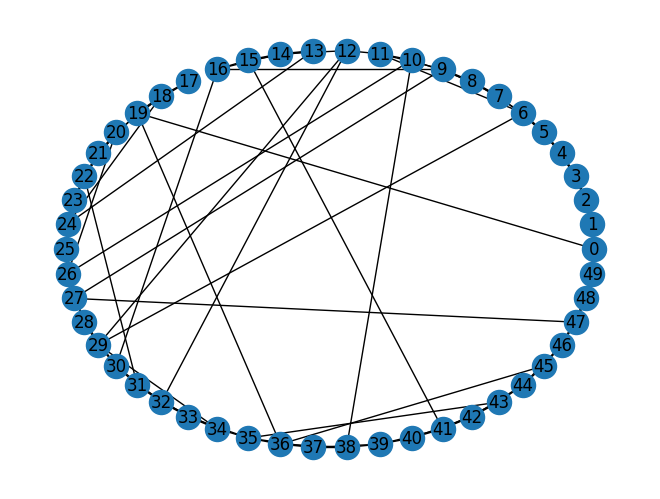

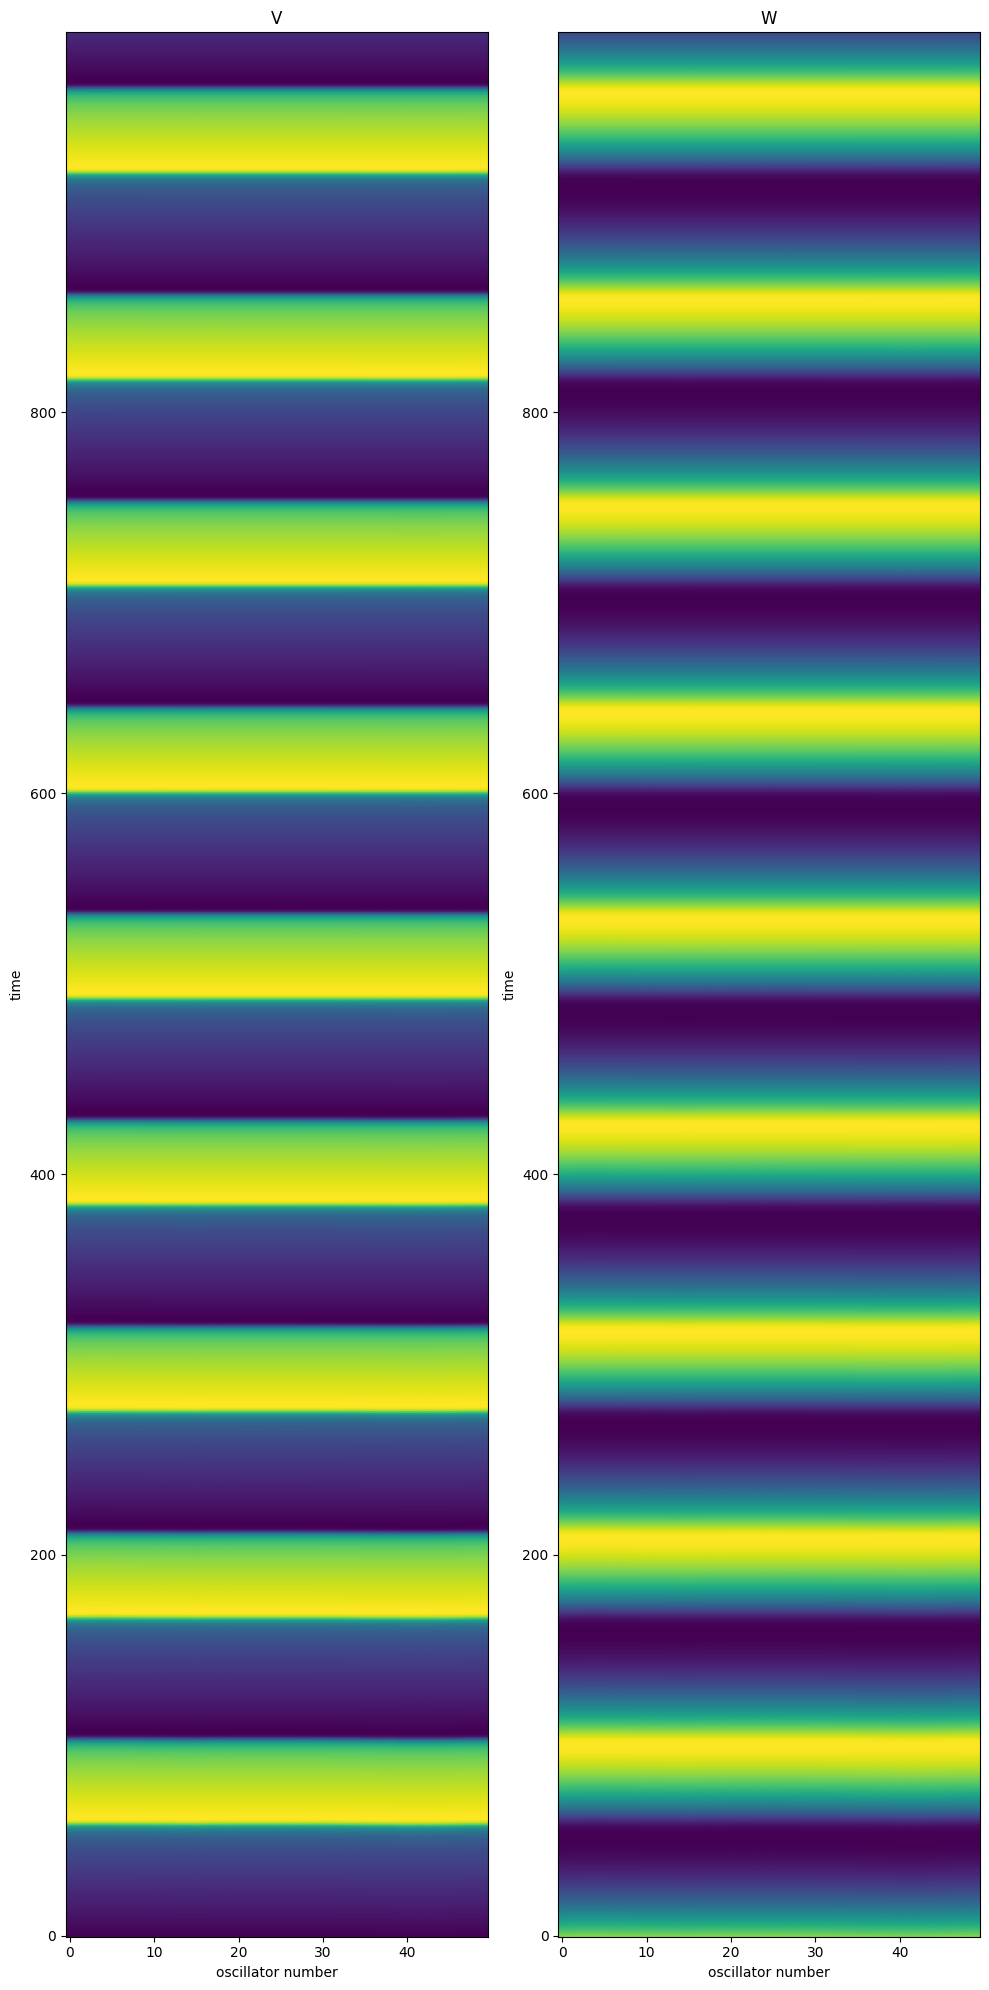

In [4]:
import networkx as nx
import scipy.integrate
import numpy as np

# Assuming 'N3', 'num_cpld_ngbrs', 'prob_of_rewiring', 'system_of_FHN', 'X_ini', 't_values', and 'plot_results' are defined elsewhere in your code.

num_cpld_ngbrs = 5
prob_of_rewiring = 0.2

# Create the graph
gr = nx.watts_strogatz_graph(N3, num_cpld_ngbrs, prob_of_rewiring)

# Convert the graph to a NumPy array (since to_numpy_matrix is deprecated)
A = nx.to_numpy_array(gr)

# Function to visualize the graph (assuming 'see_graphs' is defined)
see_graphs(gr)

# Solve the system of equations
X_final = scipy.integrate.odeint(func=system_of_FHN, y0=X_ini.flatten(), t=t_values)

# Plot the results (assuming 'plot_results' is defined)
plot_results(t_values, X_final)


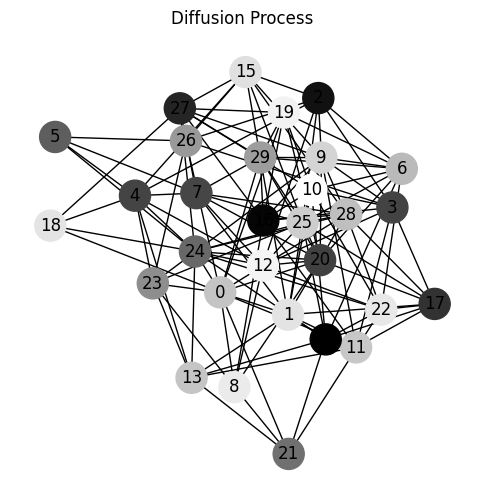

In [7]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Define parameters
alpha = 1 # Diffusion constant
Dt = 0.01  # Delta t
iterations = 100  # Number of iterations to simulate

# Create a random graph
G = nx.erdos_renyi_graph(30, 0.3)  # 30 nodes, probability of edge creation 0.3

# Initialize node states with random values between 0 and 1
for node in G.nodes:
    G.nodes[node]['state'] = np.random.rand()

# Function to update node states
def update(G, nextg):
    for i in G.nodes:
        ci = G.nodes[i]['state']
        neighbors_state_sum = sum(G.nodes[j]['state'] for j in G.neighbors(i))
        nextg.nodes[i]['state'] = ci + alpha * (neighbors_state_sum - ci * G.degree(i)) * Dt
    return nextg

# Prepare figure for animation
fig, ax = plt.subplots(figsize=(6, 6))
pos = nx.spring_layout(G)  # Layout for displaying the graph

# Function to draw the network with updated states
def draw_network(G, ax):
    # Get node states to determine color
    node_colors = [G.nodes[node]['state'] for node in G.nodes]
    nx.draw(G, pos, with_labels=True, node_size=500, node_color=node_colors, cmap=plt.cm.Greys, ax=ax)
    ax.set_title("Diffusion Process")

# Initialize the next state graph
nextg = G.copy()

# Function to update the animation
def animate(i):
    ax.clear()  # Clear the previous frame
    global G, nextg
    G = update(G, nextg)  # Update states
    draw_network(G, ax)  # Draw updated network

# Create the animation
ani = animation.FuncAnimation(fig, animate, frames=iterations, interval=200)

ani


In [9]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from matplotlib import animation
from IPython.display import HTML

# Experiment parameters
duration = 15.0  # Reduced simulation time
numff = 75

# Firefly parameters
f = 0.25
Delta_f = 0.01
T_flash = 0.2
r_int = 0.5
K = 0.18
move = True
maxvel = 1.08

# Initialize the experiment with a shorter duration
np.random.seed(0)
exp = experiment(
    duration,
    numff,
    f,
    Delta_f,
    T_flash,
    r_int,
    K,
    move,
    maxvel
)

# Create a new figure with additional subplot for the graph network
fig, axs = plt.subplots(2, 2, figsize=(16, 12))
fig.patch.set_facecolor('whitesmoke')

# Scatter plot (Top-Left)
ax_scatter = axs[0, 0]
ax_scatter.set_facecolor('black')
ax_scatter.grid(True, linestyle='--', alpha=0.7)
ax_scatter.set_xlabel("x", fontsize=12, fontweight='bold', color='white')
ax_scatter.set_ylabel("y", fontsize=12, fontweight='bold', color='white')
ax_scatter.set_xlim(0, 1)
ax_scatter.set_ylim(0, 1)
sc = ax_scatter.scatter([], [], s=60, alpha=0.75, edgecolors='k')

# Flash count and synchronization measure (Top-Right)
ax_time = axs[0, 1]
ax_time.grid(True, linestyle='--', alpha=0.7)
ax_time.set_xlabel("time [s]", fontsize=12, fontweight='bold')
ax_time.set_xlim(0, duration)
ax_time.set_ylim(0, numff)
line_flash, = ax_time.plot([], [], lw=2, color='royalblue', label="Flash Count")
ax2 = ax_time.twinx()
line_rt, = ax2.plot([], [], lw=2, color='darkorange', label="r_t (Sync Measure)")
ax2.set_ylim(0, 1)

# Graph network (Bottom-Left)
ax_graph = axs[1, 0]
ax_graph.set_title("Interaction Network", fontsize=14, fontweight='bold')
G = nx.Graph()
graph_positions = {i: (np.random.uniform(0, 1), np.random.uniform(0, 1)) for i in range(numff)}
for i in range(numff):
    G.add_node(i)
nx.draw(G, pos=graph_positions, ax=ax_graph, node_size=50, node_color="gray")

# Phase synchronization plot (Bottom-Right)
ax_polar = fig.add_subplot(224, projection='polar')
ax_polar.set_ylim(0, 1)
phase_points, = ax_polar.plot([], [], 'o', color='gray', markersize=8)
sync_line, = ax_polar.plot([], [], color='darkorange', lw=2)

# Prepare arrays to store data
nflashs = []
rt_values = []
trace_x = []
trace_y = []

def animate(frame_num):
    """Update function for each frame."""
    exp.time_stepper()

    # Update positions and flash states
    x = [firefly.x for firefly in exp.firefly_list]
    y = [firefly.y for firefly in exp.firefly_list]
    colors = ["yellow" if firefly.flash == 1.0 else 'gray' for firefly in exp.firefly_list]
    sizes = [80 if color == "yellow" else 30 for color in colors]

    sc.set_offsets(np.c_[x, y])
    sc.set_facecolors(colors)
    sc.set_sizes(sizes)

    # Flash counts and r_t
    nflashs.append(exp.count_flashs())
    rt_values.append(r_t_i(exp.number_fireflies, exp.firefly_list))
    time = np.linspace(0, len(nflashs) * exp.dt, len(nflashs))

    line_flash.set_data(time, nflashs)
    line_rt.set_data(time, rt_values)

    # Update graph network
    ax_graph.clear()
    ax_graph.set_title("Interaction Network", fontsize=14, fontweight='bold')
    interacting_edges = []
    for i, firefly_i in enumerate(exp.firefly_list):
        for j, firefly_j in enumerate(exp.firefly_list):
            if i != j:
                dist = distance(firefly_i.x - firefly_j.x, firefly_i.y - firefly_j.y)
                if dist <= r_int:
                    interacting_edges.append((i, j))
    G = nx.Graph()
    G.add_nodes_from(range(numff))
    G.add_edges_from(interacting_edges)
    nx.draw(G, pos=graph_positions, ax=ax_graph, node_size=50, node_color=colors)

    # Phase synchronization
    phases = [firefly.theta for firefly in exp.firefly_list]
    avg_phase = np.angle(np.sum(np.exp(1j * np.array(phases))) / exp.number_fireflies)
    phase_points.set_data(phases, [1] * len(phases))
    sync_line.set_data([0, avg_phase], [0, rt_values[-1]])

# Animation
ani = animation.FuncAnimation(
    fig, animate, frames=exp.iters, interval=20, repeat=False
)

HTML(ani.to_html5_video())


NameError: name 'experiment' is not defined

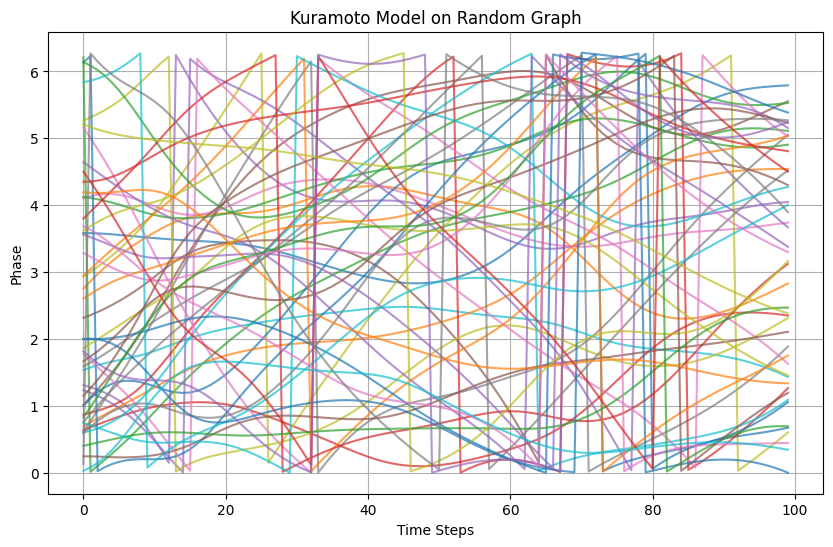

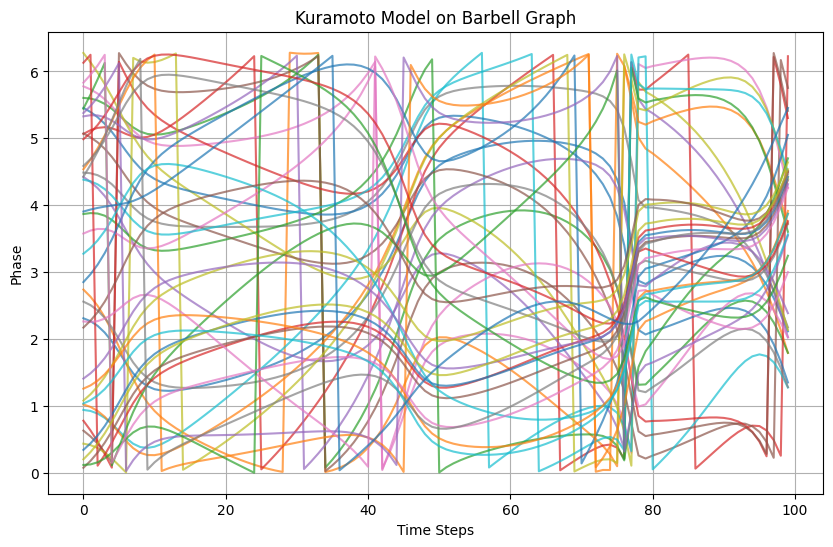

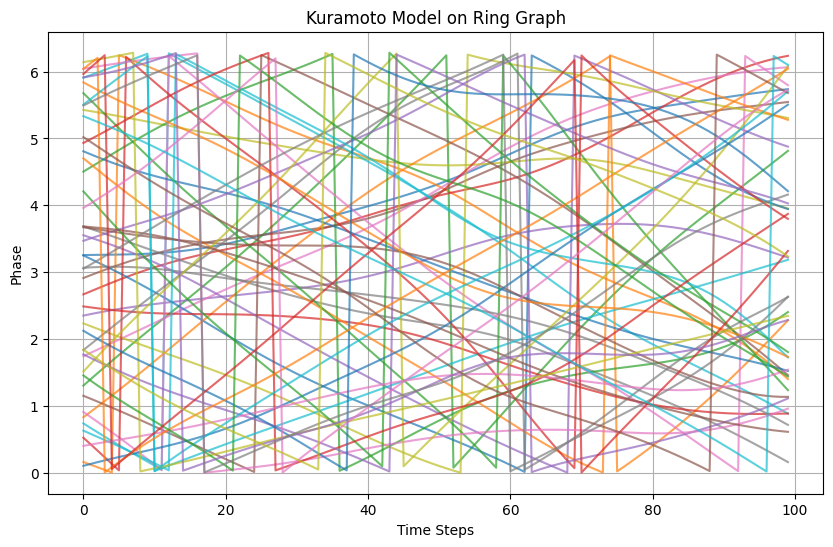

In [10]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

def kuramoto_simulation(graph, K, timesteps, dt):
    """
    Simulate the Kuramoto model on a network.
    Parameters:
        graph: NetworkX graph object.
        K: Coupling constant.
        timesteps: Number of timesteps.
        dt: Time step size.
    Returns:
        A 2D numpy array with shape (N, timesteps), where each row represents the phase of an oscillator over time.
    """
    N = graph.number_of_nodes()
    A = nx.to_numpy_array(graph)  # Adjacency matrix
    natural_frequencies = np.random.uniform(-1, 1, N)  # Random natural frequencies
    phases = np.random.uniform(0, 2 * np.pi, N)  # Initial random phases
    
    phase_history = np.zeros((N, timesteps))
    phase_history[:, 0] = phases

    for t in range(1, timesteps):
        dtheta = natural_frequencies + (K / N) * np.sum(
            A @ np.sin(np.subtract.outer(phases, phases)), axis=1
        )
        phases += dtheta * dt
        phases = phases % (2 * np.pi)  # Keep phases within [0, 2π]
        phase_history[:, t] = phases

    return phase_history

def plot_kuramoto_results(phase_history, title):
    """
    Plot the synchronization dynamics for the Kuramoto model.
    """
    plt.figure(figsize=(10, 6))
    for i in range(phase_history.shape[0]):
        plt.plot(phase_history[i], label=f"Oscillator {i}", alpha=0.7)
    plt.title(title)
    plt.xlabel("Time Steps")
    plt.ylabel("Phase")
    plt.grid()
    plt.show()

# Simulation parameters
timesteps = 100
dt = 0.1
K = 2.0  # Coupling strength

# Generate network topologies
random_graph = nx.erdos_renyi_graph(n=50, p=0.1)
barbell_graph = nx.barbell_graph(m1=20, m2=1)
ring_graph = nx.cycle_graph(n=50)

# Simulate Kuramoto model
phases_random = kuramoto_simulation(random_graph, K, timesteps, dt)
phases_barbell = kuramoto_simulation(barbell_graph, K, timesteps, dt)
phases_ring = kuramoto_simulation(ring_graph, K, timesteps, dt)

# Plot synchronization results
plot_kuramoto_results(phases_random, "Kuramoto Model on Random Graph")
plot_kuramoto_results(phases_barbell, "Kuramoto Model on Barbell Graph")
plot_kuramoto_results(phases_ring, "Kuramoto Model on Ring Graph")
